In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preparation

In [3]:
df = pd.read_csv('../data/pp_4l_all.csv')
cols_cont = [
    'E1', 'p1x', 'p1y', 'p1z', 
    'E2', 'p2x', 'p2y', 'p2z',
    'E3', 'p3x', 'p3y', 'p3z',
    'E4', 'p4x', 'p4y', 'p4z', 
]
cols_cat = ['pdg1', 'pdg2', 'pdg3', 'pdg4']

In [4]:
def get_m_values(df):
    e_sum_sq = np.power(df['E1'] + df['E2'] + df['E3'] + df['E4'], 2)
    x_sum_sq = np.power(df['p1x'] + df['p2x'] + df['p3x'] + df['p4x'], 2)
    y_sum_sq = np.power(df['p1y'] + df['p2y'] + df['p3y'] + df['p4y'], 2)
    z_sum_sq = np.power(df['p1z'] + df['p2z'] + df['p3z'] + df['p4z'], 2)
    m_values = np.sqrt(e_sum_sq - x_sum_sq - y_sum_sq - z_sum_sq)
    return m_values

m_values = get_m_values(df)

In [7]:
from sklearn.model_selection import train_test_split

idx_train, idx_test = train_test_split(range(len(df)), train_size=0.5, random_state=123)
X_train, X_test = df[cols_cont].values[idx_train], df[cols_cont].values[idx_test]
m_train, m_test = m_values[idx_train], m_values[idx_test]

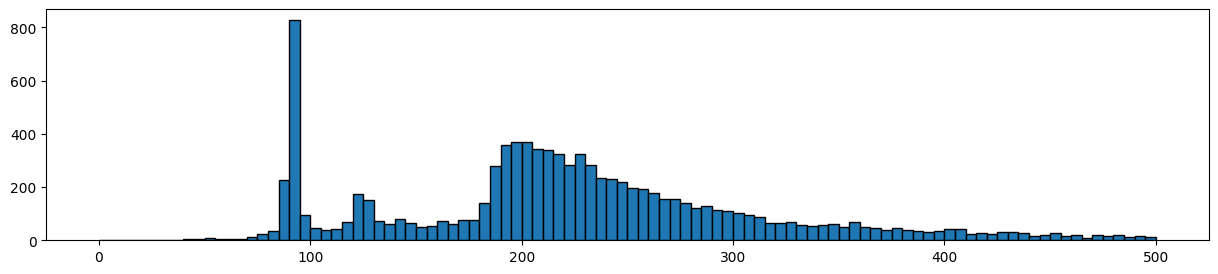

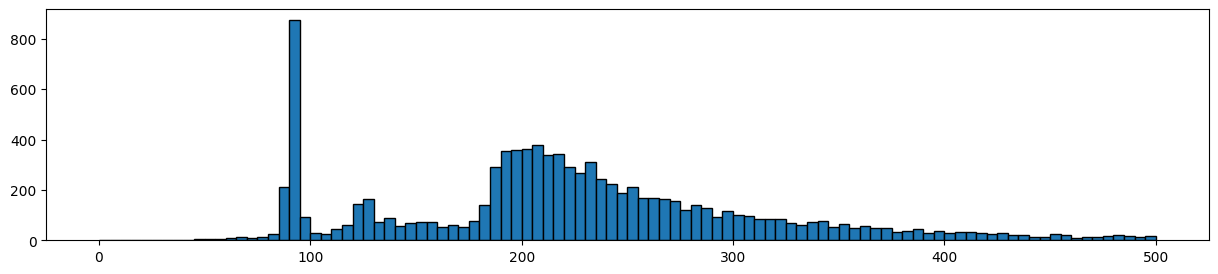

In [8]:
plt.figure(figsize=(15, 3))
plt.hist(m_train, bins=100, range=(0, 500), edgecolor='black')
plt.show()

plt.figure(figsize=(15, 3))
plt.hist(m_test, bins=100, range=(0, 500), edgecolor='black')
plt.show()

# KDE

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=0.1)
kde.fit(X_train)

X_sampled = kde.sample(len(X_test), random_state=123)
df_sampled = pd.DataFrame(X_sampled, columns=cols_cont)
m_sampled = get_m_values(df_sampled)

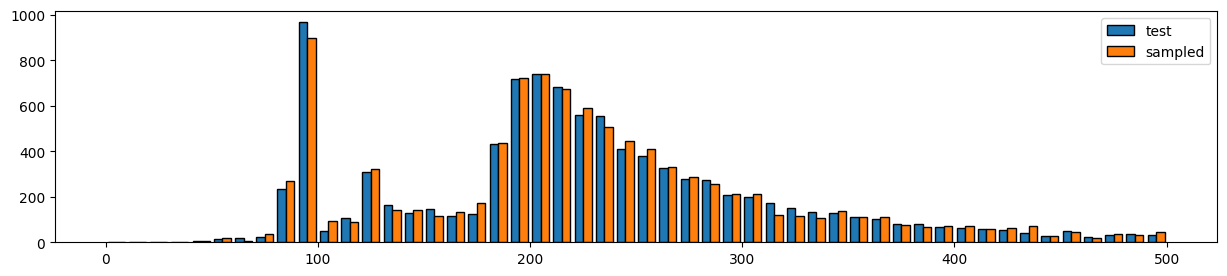

In [10]:
plt.figure(figsize=(15, 3))
plt.hist([m_test, m_sampled], bins=50, range=(0, 500), edgecolor='black', label=['test', 'sampled'])
plt.legend()
plt.show()

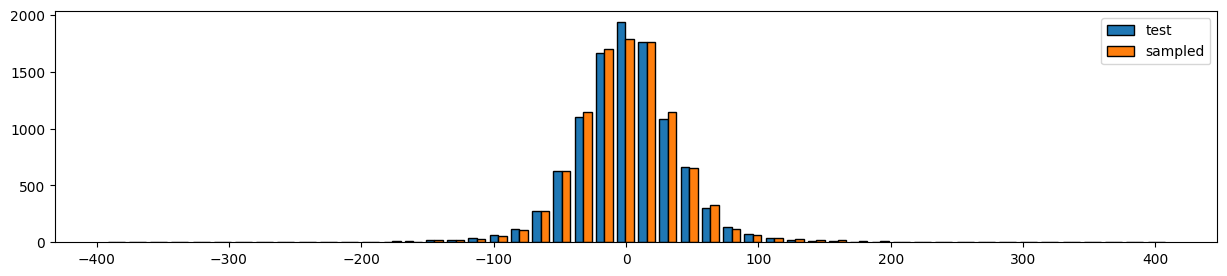

In [11]:
plt.figure(figsize=(15, 3))
plt.hist([X_test[:, 2], X_sampled[:, 2]], bins=50, edgecolor='black', label=['test', 'sampled'])
plt.legend()
plt.show()

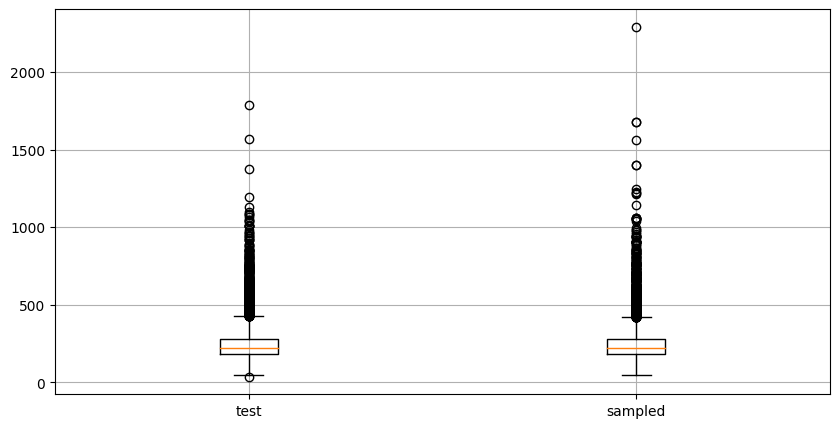

In [12]:
plt.figure(figsize=(10, 5))
plt.boxplot([m_test, m_sampled], labels=['test', 'sampled'])
plt.grid()
plt.show()

In [13]:
from scipy.stats import kstest

stat, p_value = kstest(m_train, m_test)
print(stat, p_value)

0.0102 0.6756592612416861


In [14]:
stat, p_value = kstest(m_train, m_sampled)
print(stat, p_value)

0.0107 0.6160853764303585


In [15]:
stat, p_value = kstest(m_test, m_sampled)
print(stat, p_value)

0.011 0.5806415540561973


In [16]:
X_test[:, 2].mean()

0.3183126708628257